In [1]:
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.datasets import make_regression

# Repeating the results

In [2]:
num_experiments = 100
hist_params = {'bins':25,'grid':False,'sharey':True,'sharex':False}#,'ylim':(0,30)}#,'sharex':True}#,'ylabelsize':1}


# Linear Case

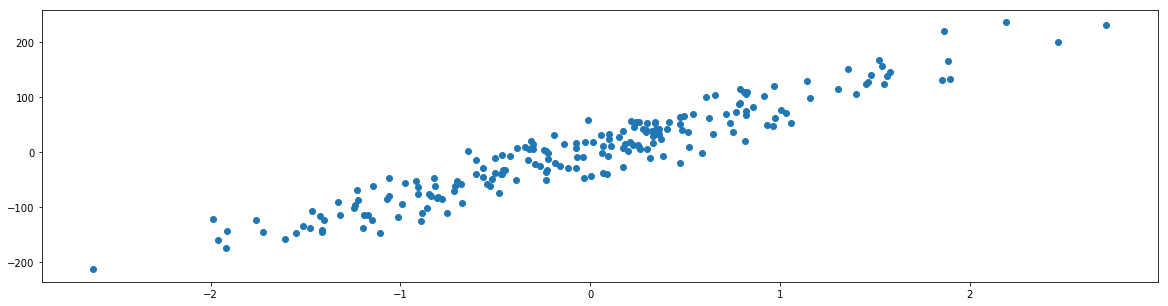

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)

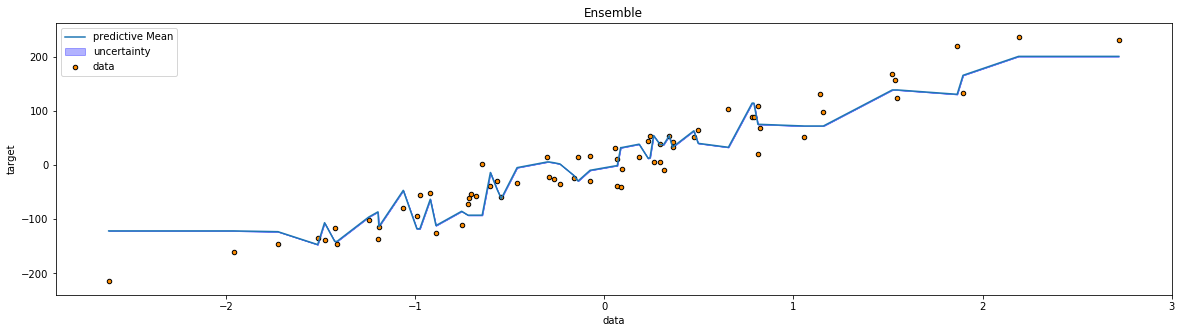

In [4]:
treeEnsemble = ensemble.RegressionEnsemble(100,DecisionTreeRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

In [5]:
results_list = []

for i in range(num_experiments):
    treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor,seed = i+42)
    treeEnsemble.fit(X_train,y_train)
    results = treeEnsemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_tree_results = pd.DataFrame.from_records(results_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c740588>,
      dtype=object)

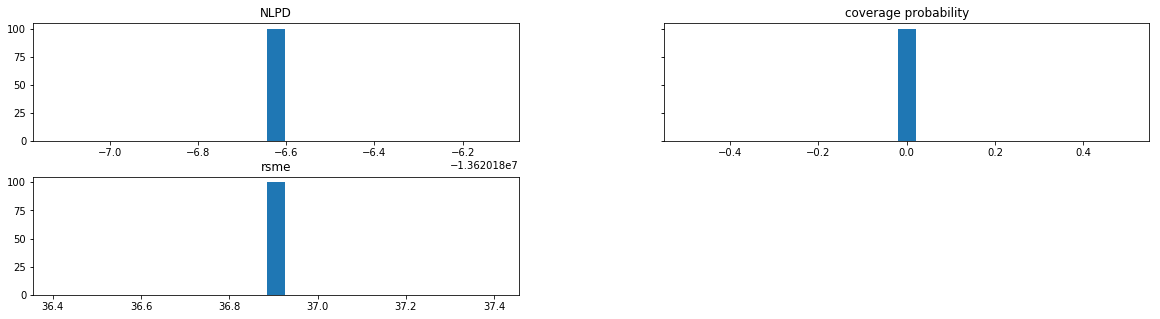

In [6]:
df_tree_results.hist(**hist_params)

In [7]:
df_tree_results.describe()

,NLPD,coverage probability,rsme
count,1.000000e+02,100.0,1.000000e+02
mean,-1.362019e+07,0.0,3.690554e+01
std,1.872029e-09,0.0,1.428245e-14
min,-1.362019e+07,0.0,3.690554e+01
25%,-1.362019e+07,0.0,3.690554e+01
50%,-1.362019e+07,0.0,3.690554e+01
75%,-1.362019e+07,0.0,3.690554e+01
max,-1.362019e+07,0.0,3.690554e+01


## Mixed Ensemble

In [8]:
results_list = []

for i in range(num_experiments):
    mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
    mixed_ensemble.fit(X_train,y_train)
    results = mixed_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_mixed_results = pd.DataFrame.from_records(results_list)

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb92f28>,
      dtype=object)

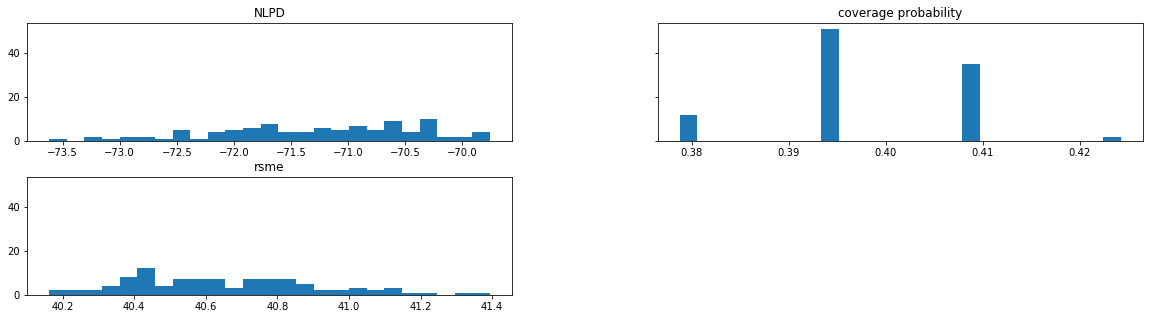

In [9]:
df_mixed_results.hist(**hist_params)

In [10]:
df_mixed_results.describe()

,NLPD,coverage probability,rsme
count,100.000000,100.000000,100.000000
mean,-71.291275,0.398030,40.653073
std,0.891667,0.010518,0.260402
min,-73.618529,0.378788,40.162039
25%,-71.901945,0.393939,40.446217
50%,-71.230428,0.393939,40.621968
75%,-70.589943,0.409091,40.806812
max,-69.757982,0.424242,41.394204


# Bootstrap

In [11]:
results_list = []

for i in range(num_experiments):
    bootstrap_ensemble = ensemble.BootstrapEnsemble()
    bootstrap_ensemble.fit(X_train,y_train)
    results = bootstrap_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_bootstrap_results = pd.DataFrame.from_records(results_list)

df_bootstrap_results.describe()

,NLPD,coverage probability,rsme
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-7.063459e+01,4.545455e-01,3.391720e+01
std,1.428245e-14,1.673724e-16,7.141223e-15
min,-7.063459e+01,4.545455e-01,3.391720e+01
25%,-7.063459e+01,4.545455e-01,3.391720e+01
50%,-7.063459e+01,4.545455e-01,3.391720e+01
75%,-7.063459e+01,4.545455e-01,3.391720e+01
max,-7.063459e+01,4.545455e-01,3.391720e+01



# Random Shuffling

In [12]:
results_list = []

for i in range(num_experiments):
    shuffling_ensemble = ensemble.ShuffleEnsemble()
    shuffling_ensemble.fit(X_train,y_train)
    results = shuffling_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_shuffle_results = pd.DataFrame.from_records(results_list)

df_shuffle_results.describe()

,NLPD,coverage probability,rsme
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-1.282432e+07,1.515152e-02,3.690731e+01
std,1.872029e-09,5.230388e-18,1.428245e-14
min,-1.282432e+07,1.515152e-02,3.690731e+01
25%,-1.282432e+07,1.515152e-02,3.690731e+01
50%,-1.282432e+07,1.515152e-02,3.690731e+01
75%,-1.282432e+07,1.515152e-02,3.690731e+01
max,-1.282432e+07,1.515152e-02,3.690731e+01


# Boston

In [13]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#hist_params= {}#{'bins':25}

## Simple trees

In [14]:
results_list = []

for i in range(num_experiments):
    treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor,seed = i+42)
    treeEnsemble.fit(X_train,y_train)
    results = treeEnsemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_tree_results = pd.DataFrame.from_records(results_list)

In [15]:
df_tree_results.head()

,NLPD,coverage probability,rsme
0,-67682.481712,0.131737,4.262507
1,-67682.773442,0.131737,4.271404
2,-67682.060879,0.137725,4.291311
3,-66061.443691,0.125749,4.279215
4,-62534.069135,0.137725,4.274653


In [16]:
df_tree_results.describe()

,NLPD,coverage probability,rsme
count,100.000000,100.000000,100.000000
mean,-64443.305128,0.123114,4.301257
std,4137.934082,0.010046,0.028315
min,-80563.106080,0.095808,4.241548
25%,-67451.574247,0.118263,4.279030
50%,-63504.946744,0.125749,4.297514
75%,-60282.600727,0.131737,4.325266
max,-59746.238343,0.143713,4.364695


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d7c3978>,
      dtype=object)

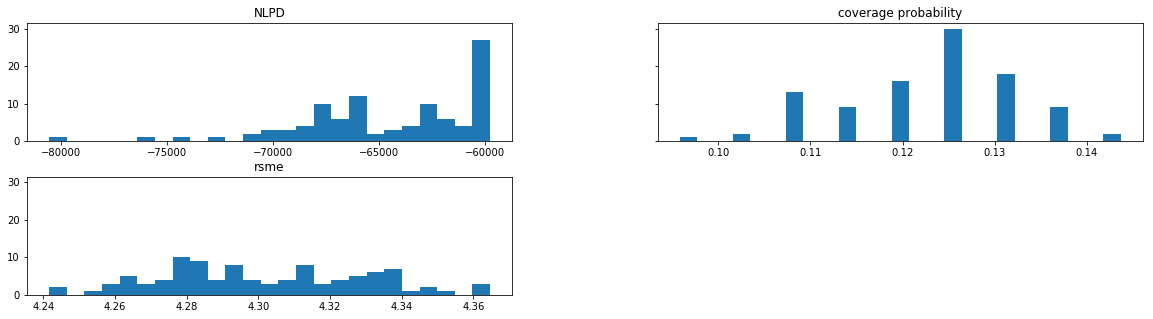

In [17]:
df_tree_results.hist(**hist_params)

## mixed Ensembles

In [18]:
results_list = []

for i in range(num_experiments):
    mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
    mixed_ensemble.fit(X_train,y_train)
    results = mixed_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_mixed_results = pd.DataFrame.from_records(results_list)

In [19]:
df_mixed_results.head()

,NLPD,coverage probability,rsme
0,-8.171152,0.676647,8.468414
1,-7.632074,0.820359,8.569401
2,-6.697038,0.658683,6.231346
3,-5.751536,0.862275,7.110484
4,-6.274625,0.748503,6.194322


In [20]:
df_mixed_results.describe()

,NLPD,coverage probability,rsme
count,100.000000,100.000000,100.000000
mean,-7.181499,0.757964,7.418076
std,0.929662,0.108428,1.793639
min,-9.585687,0.550898,4.732359
25%,-7.763550,0.663174,5.682517
50%,-7.163830,0.748503,7.889911
75%,-6.558254,0.857784,8.958643
max,-5.155597,0.940120,11.036920


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d922710>,
      dtype=object)

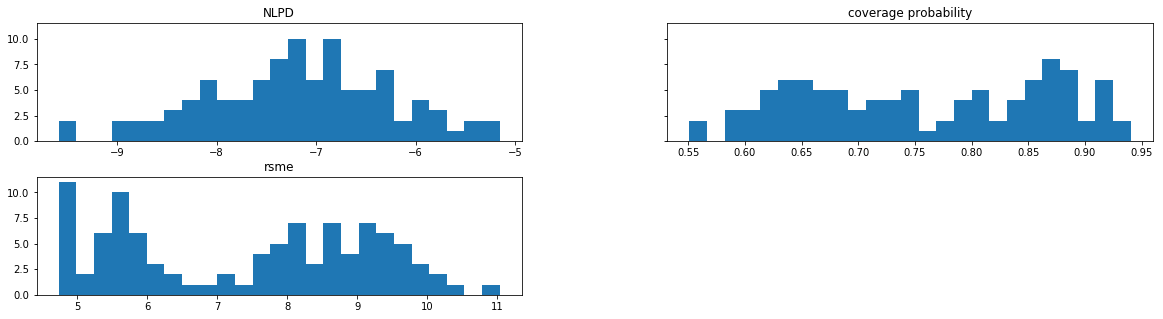

In [21]:
df_mixed_results.hist(**hist_params)

## Bootstrap

In [22]:
results_list = []

for i in range(num_experiments):
    bootstrap_ensemble = ensemble.BootstrapEnsemble()

    bootstrap_ensemble.fit(X_train,y_train)
    results = bootstrap_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_bootstrap_results = pd.DataFrame.from_records(results_list)

In [23]:
df_bootstrap_results.head()

,NLPD,coverage probability,rsme
0,-4.003883,0.694611,3.744273
1,-4.045138,0.694611,3.681361
2,-3.896641,0.718563,3.757147
3,-4.056271,0.688623,3.751481
4,-4.050532,0.706587,3.782409


In [24]:
df_bootstrap_results.describe()

,NLPD,coverage probability,rsme
count,100.000000,100.000000,100.000000
mean,-4.040571,0.693353,3.737239
std,0.093248,0.017593,0.043292
min,-4.330390,0.640719,3.647002
25%,-4.087791,0.682635,3.704110
50%,-4.027133,0.694611,3.734082
75%,-3.981724,0.706587,3.769194
max,-3.819733,0.742515,3.846035


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de33be0>,
      dtype=object)

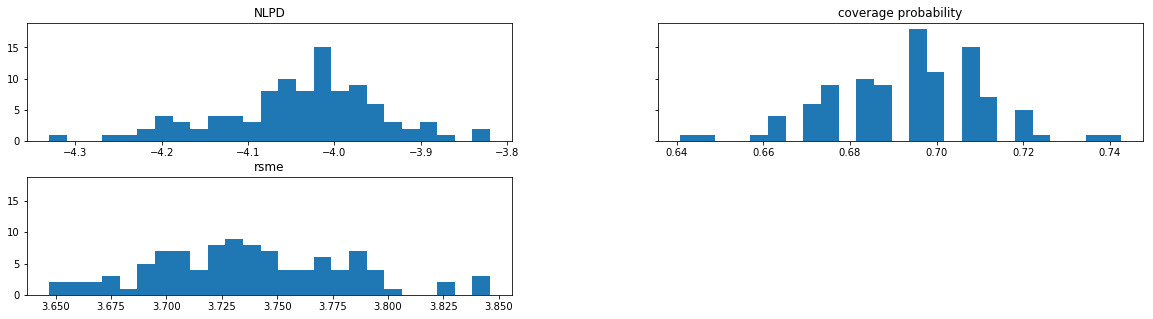

In [25]:
df_bootstrap_results.hist(**hist_params)

## Different Data Shuffling

In [26]:
results_list = []

for i in range(num_experiments):
    shuffle_ensemble = ensemble.ShuffleEnsemble()
    shuffle_ensemble.fit(X_train,y_train)
    results = shuffle_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_shuffle_results = pd.DataFrame.from_records(results_list)

In [27]:
df_shuffle_results.head()

,NLPD,coverage probability,rsme
0,-63712.573912,0.161677,4.247949
1,-66460.302430,0.155689,4.253909
2,-66385.828367,0.149701,4.292616
3,-68787.142483,0.137725,4.298168
4,-61482.517850,0.167665,4.307432


In [28]:
df_shuffle_results.describe()

,NLPD,coverage probability,rsme
count,100.000000,100.000000,100.000000
mean,-63718.941426,0.153952,4.283152
std,3532.591641,0.011204,0.027896
min,-74790.934131,0.125749,4.218947
25%,-66167.978480,0.143713,4.268265
50%,-62904.720730,0.155689,4.282093
75%,-60622.585957,0.161677,4.297966
max,-59664.837556,0.185629,4.364401


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e218278>,
      dtype=object)

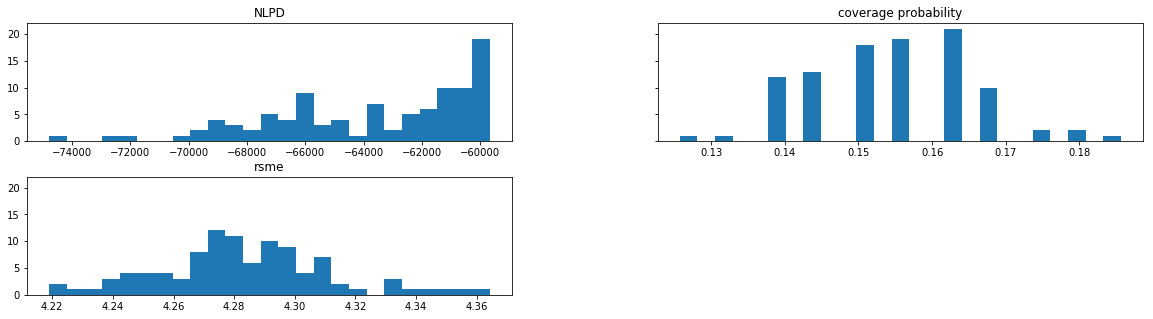

In [29]:
df_shuffle_results.hist(**hist_params)